## Logistic Regression:
* Logistic Regression is a supervised Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.
* We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’.
* In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1.

### Why can't we use linear regression for classification:
There are main two reasons:
1. In linear regression we use best fit line which is sensitive to outliers.
2. Linear regression does not impose any bounds on the predicted values. In classification, probabilities or class membership probabilities should be bounded between 0 and 1. Linear regression can produce predictions beyond this range, leading to incorrect interpretations and predictions outside the valid probability range.

## Importing libraries...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"E:\Courses\Data science(ETLHive)\dataset\heart (1).csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Dataset is already preprocessed.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Age, trestbps, chol, thalach and oldpeak are numerical columns others are categorical.

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
num_col=df[['age', 'trestbps', 'chol', 'thalach','oldpeak']]

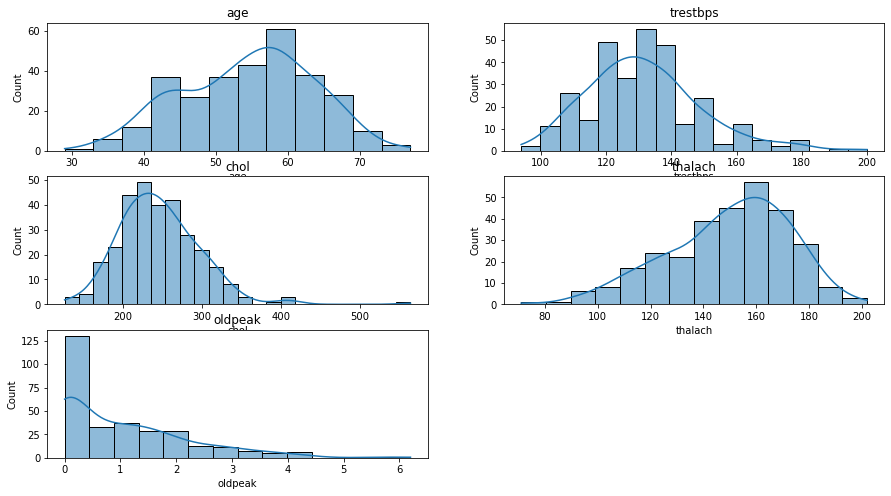

In [11]:
x=1
plt.figure(figsize=(15,8))
for i in num_col.columns:

    plt.subplot(3,2,x)
    sns.histplot(df[i],kde=True)
    plt.title('{0}'.format(i))
    x+=1
    

* There are outliers in chol column.
* columns are skewed.

## Splitting the data...

In [12]:
X=df.drop('target',axis=1)
Y=df['target']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42)

In [14]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Model Building

In [15]:
lr=LogisticRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



<AxesSubplot:>

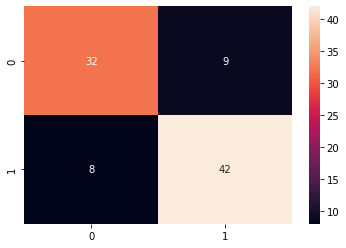

In [17]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

##  ROC curve :

* The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise.’

## AUC :
* The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.
There are some cases in AUC
1. When AUC = 1, the classifier can correctly distinguish between all the Positive and the Negative class points.
2. If, however, the AUC had been 0, then the classifier would predict all Negatives as Positives and all Positives as Negatives.
3. When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative ones.

In [18]:
y_predprob=lr.predict_proba(x_test)
y_predprob[:10]

array([[0.90630034, 0.09369966],
       [0.31222351, 0.68777649],
       [0.12942563, 0.87057437],
       [0.99044993, 0.00955007],
       [0.03716041, 0.96283959],
       [0.05136422, 0.94863578],
       [0.49183906, 0.50816094],
       [0.99850133, 0.00149867],
       [0.99610452, 0.00389548],
       [0.65848707, 0.34151293]])

In [19]:
fpr,tpr,threshold = roc_curve(y_test,y_predprob[:,1]) #target 1 probability

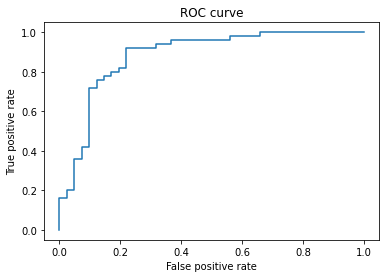

In [20]:
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.savefig('ROC_curve.png')

In [23]:
auc(fpr,tpr)

0.8824390243902439

## Conclusion:
* We are getting 81% accuracy score with good recall score.
* We are getting 0.88 as area under curve(auc). So our model is performing well.